# Astro203 Nirc2 Data Analysis Lab

In [116]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from matplotlib.colors import LogNorm

## Load Individual Nirc2 Data
this is only for loading one fits file

In [119]:
nirc2_path = '2016jul14/n0021.fits.gz'
nirc2_image = fits.open(nirc2_path)
#nirc2_image.info()
nirc2_data = nirc2_image[0].data
print(nirc2_data.shape)
print(type(nirc2_data))

(1024, 1024)
<class 'numpy.ndarray'>


## Load Multiple Nirc2 Data
This is for loading multiple fits file for visualization

In [111]:
value_init = 21 #starting value for data
value_end = 31 #end value + 1
values = np.arange(value_init, value_end)
nirc2_datas = []

for value in values:
    nirc2_path_value = f'2016jul14/n00{value}.fits.gz'
    nirc2_image_value = fits.open(nirc2_path_value)
    nirc2_data_value = nirc2_image_value[0].data
    nirc2_datas.append(nirc2_data_value)

## Averaging and detrending functions

In [173]:
# Outputs averaged image and variance of each pixel of a dataset
def image_processing(signal):
    image_avg = np.average(signal, axis=0)
    image_var = np.std(signal, axis=0)
    return image_avg, image_var

# Outputs average & median signal value and variance of image
def processing(signal):
    data_med = np.median(signal)
    data_avg = np.average(signal)
    data_var = np.std(signal)
    return data_med, data_avg, data_var

# Takes integration time, averaged signal of that integration time, and does polyfit to calculate dark signal per second integration
def trend_poly(t_int, signal_int, degree):
    fit = np.polyfit(t_int, signal_int, degree)
    dark_poly = np.polyval(fit, t_int)
    return dark_poly

## Master Dark Function
We first separately load data sets with different exposure times. Then we will plot the median dark signal of each averaged data set vs total exposure time (int time x coadd #) for linear regression. Then we will calculate dark signal per 1s exposure time.

### Load all dark data and find average image of each set

In [166]:
number_set_0 = np.arange(21, 31) #5s, 6 integration time and coadd value
number_set_1 = np.arange(31, 41) #60s, 1
number_set_2 = np.arange(41, 51) #10s, 3
number_set_3 = np.arange(61, 71) #30s, 2
t_int_0 = 5
t_int_1 = 60
t_int_2 = 10
t_int_3 = 30
coadd_0 = 6
coadd_1 = 1
coadd_2 = 3
coadd_3 = 2
nirc2_datas_0 = []
nirc2_datas_1 = []
nirc2_datas_2 = []
nirc2_datas_3 = []

for value in number_set_0:
    nirc2_path_value = f'2016jul14/n00{value}.fits.gz'
    nirc2_image_value = fits.open(nirc2_path_value)
    nirc2_data_value = nirc2_image_value[0].data
    nirc2_datas_0.append(nirc2_data_value)
    
for value in number_set_1:
    nirc2_path_value = f'2016jul14/n00{value}.fits.gz'
    nirc2_image_value = fits.open(nirc2_path_value)
    nirc2_data_value = nirc2_image_value[0].data
    nirc2_datas_1.append(nirc2_data_value)    

for value in number_set_2:
    nirc2_path_value = f'2016jul14/n00{value}.fits.gz'
    nirc2_image_value = fits.open(nirc2_path_value)
    nirc2_data_value = nirc2_image_value[0].data
    nirc2_datas_2.append(nirc2_data_value)
    
for value in number_set_3:
    nirc2_path_value = f'2016jul14/n00{value}.fits.gz'
    nirc2_image_value = fits.open(nirc2_path_value)
    nirc2_data_value = nirc2_image_value[0].data
    nirc2_datas_3.append(nirc2_data_value)

med_0, data_0, var_0 = processing(nirc2_datas_0)
med_1, data_1, var_1 = processing(nirc2_datas_1)
med_2, data_2, var_2 = processing(nirc2_datas_2)
med_3, data_3, var_3 = processing(nirc2_datas_3)
image_avg_0, image_var_0 = image_processing(nirc2_datas_0)
image_avg_1, image_var_1 = image_processing(nirc2_datas_1)
image_avg_2, image_var_2 = image_processing(nirc2_datas_2)
image_avg_3, image_var_3 = image_processing(nirc2_datas_3)
data_coadd_reduced = np.array([data_0/coadd_0, data_1/coadd_1, data_2/coadd_2, data_3/coadd_3])
t_int = np.array([t_int_0, t_int_1, t_int_2, t_int_3])

### Plot polynomial trend of coadd reduced data w.r.t. integration time

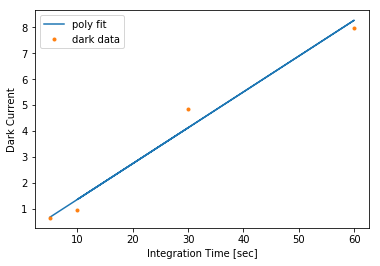

In [174]:
dark_fit_func = trend_poly(t_int, data_coadd_reduced, 1)

plt.figure()
plt.plot(t_int, dark_fit_func, label='poly fit')
plt.plot(t_int, data_coadd_reduced, '.', label='dark data')
plt.xlabel('Integration Time [sec]')
plt.ylabel('Dark Current')
plt.legend()
plt.show()

## View Image

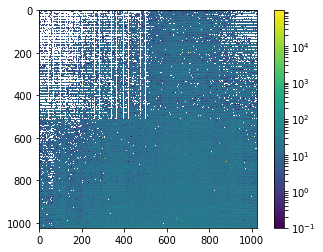

In [155]:
plt.imshow(image_avg_3, norm=LogNorm())
plt.colorbar()
plt.show()